## pata hoy
curvas roc
ridge


Regresion ridge
es como la lineal, pero le genera algunas penalizaciones a los theta par evitar el overfitting
este sirve para hacer regresiones y clasificador
donde el hiperparametro es el alpha y este se va ajustando


por el momento hemos visto
clasificación
knn, arboles, random forest, ridge classifier, bagging tree

tienen los mismos pasos:
crear el objeto
entrenar
se evalua
y se usa con el predict

la curva roc
es una curva que muestra la relacion entre la tasa de TP y la tasa de FP 
este sirve en su mayoria para binarios
baseline es = a 0.5 pq el clasificador es aleatorio
donde esto muestra los posibles errores que pueda tener el clasificador
AUC es la intercección con la curva e indica si el modelo es bueno

para plotear la curva
plt_roc_curve(el regresor, x_test,y_test)
obviamente hay que traer la libreria para esto

## ejercicio
aplicar todos los modelos de clasificación
con optimizacion, reporte, matriz de confusion y curva ROC
el archivo: '/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_7/Data/Invistico_Airline.csv'

## importando las librerias

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve


from sklearn.model_selection import GridSearchCV

## cargando la data

In [15]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_7/Data/Invistico_Airline.csv'
data_invistico=pd.read_csv(archivo)

## primeras impresiones

In [16]:
data_invistico

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


Se ven variables categoricas en formato string, hay que transformarlas a numero

Revisando más a detalle 

In [17]:
data_invistico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

pueden haber más NAN

In [18]:
data_invistico.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

solo la ultima columna tiene NaN

In [19]:
data_invistico['Arrival Delay in Minutes']

0           0.0
1         305.0
2           0.0
3           0.0
4           0.0
          ...  
129875      0.0
129876    172.0
129877    163.0
129878    205.0
129879    186.0
Name: Arrival Delay in Minutes, Length: 129880, dtype: float64

In [20]:
data_invistico.loc[data_invistico['Arrival Delay in Minutes'].isna(),:]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
145,satisfied,Female,Loyal Customer,21,Personal Travel,Eco,4804,0,2,0,...,5,5,4,1,4,2,3,5,20,NaN
246,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1364,0,3,0,...,4,2,1,1,3,4,3,2,0,NaN
710,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1792,0,5,0,...,5,5,4,4,5,3,4,5,24,NaN
736,satisfied,Male,Loyal Customer,9,Personal Travel,Eco,1862,0,5,0,...,3,3,5,3,4,4,4,3,0,NaN
818,dissatisfied,Male,Loyal Customer,9,Personal Travel,Eco,1668,1,0,1,...,4,4,4,5,1,5,1,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127739,satisfied,Male,Loyal Customer,44,Business travel,Business,3431,2,2,3,...,4,5,5,5,5,5,5,4,70,NaN
128131,satisfied,Male,Loyal Customer,39,Business travel,Business,1595,4,4,4,...,5,5,5,5,5,3,5,5,0,NaN
128710,satisfied,Female,Loyal Customer,45,Business travel,Eco,871,5,1,1,...,2,5,5,5,5,1,5,5,100,NaN
129774,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,1594,5,4,5,...,3,3,1,4,3,3,4,3,0,NaN


se asumira que el tiempo de retraso de salida es igual al tiempo de retraso de llegada

In [21]:
data_invistico.corr()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,-0.249625,0.008784,0.039055,0.015749,-0.000547,0.013965,0.130511,0.121201,0.071594,0.066704,0.083762,-0.015452,0.031845,-0.018271,0.037973,-0.009041,-0.011248
Flight Distance,-0.249625,1.000000,-0.042409,0.001350,-0.004649,-0.002409,0.012230,-0.027542,-0.032022,-0.022299,-0.032559,-0.030316,0.019768,0.002456,0.009432,0.009604,0.112555,0.110103
Seat comfort,0.008784,-0.042409,1.000000,0.434951,0.715997,0.405300,0.129131,0.426447,0.120278,0.211531,0.121149,0.136136,0.118489,0.041214,0.108475,0.130396,-0.023817,-0.025506
Departure/Arrival time convenient,0.039055,0.001350,0.434951,1.000000,0.527381,0.544259,-0.001974,0.077203,-0.000546,0.001755,0.060446,0.029422,0.067396,0.062794,0.067126,-0.000623,0.004395,0.002599
Food and drink,0.015749,-0.004649,0.715997,0.527381,1.000000,0.523328,0.025917,0.367669,0.028554,0.041189,0.038646,0.074161,0.036370,0.011898,0.033416,0.013587,-0.013433,-0.014881
Gate location,-0.000547,-0.002409,0.405300,0.544259,0.523328,1.000000,-0.004086,-0.000280,0.002908,0.001442,-0.025132,-0.007407,-0.000401,-0.031859,-0.001705,-0.003043,0.003962,0.003640
Inflight wifi service,0.013965,0.012230,0.129131,-0.001974,0.025917,-0.004086,1.000000,0.253823,0.557340,0.601100,0.060794,0.033589,0.038251,0.092508,0.038263,0.631786,-0.032900,-0.035270
Inflight entertainment,0.130511,-0.027542,0.426447,0.077203,0.367669,-0.000280,0.253823,1.000000,0.441957,0.321731,0.183912,0.160731,0.117213,0.224120,0.109451,0.355714,-0.030491,-0.033321
Online support,0.121201,-0.032022,0.120278,-0.000546,0.028554,0.002908,0.557340,0.441957,1.000000,0.617489,0.157930,0.138433,0.102444,0.206824,0.095726,0.669843,-0.034018,-0.036087
Ease of Online booking,0.071594,-0.022299,0.211531,0.001755,0.041189,0.001442,0.601100,0.321731,0.617489,1.000000,0.436264,0.355122,0.398322,0.137744,0.417675,0.684320,-0.036545,-0.039806


la correlacion de estas variables es casí uno, por lo que se igualaran las columnas

In [22]:
data_invistico['Arrival Delay in Minutes']=data_invistico['Departure Delay in Minutes']

In [23]:
data_invistico

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,310
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,174
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,155
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,193


In [24]:
data_invistico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   satisfaction                       129880 non-null  object
 1   Gender                             129880 non-null  object
 2   Customer Type                      129880 non-null  object
 3   Age                                129880 non-null  int64 
 4   Type of Travel                     129880 non-null  object
 5   Class                              129880 non-null  object
 6   Flight Distance                    129880 non-null  int64 
 7   Seat comfort                       129880 non-null  int64 
 8   Departure/Arrival time convenient  129880 non-null  int64 
 9   Food and drink                     129880 non-null  int64 
 10  Gate location                      129880 non-null  int64 
 11  Inflight wifi service              129880 non-null  

## cambiando las variables categoricas a numericas

In [27]:
from sklearn.preprocessing import LabelEncoder


In [25]:
columna=list(data_invistico.describe(include=object).columns)
for i in range(len(columna)):
    print (columna[i],data_invistico[columna[i]].unique() )

satisfaction ['satisfied' 'dissatisfied']
Gender ['Female' 'Male']
Customer Type ['Loyal Customer' 'disloyal Customer']
Type of Travel ['Personal Travel' 'Business travel']
Class ['Eco' 'Business' 'Eco Plus']


In [28]:
for i in range (len(columna)):
    etiq = LabelEncoder()
    Label = etiq.fit_transform(data_invistico[columna[i]])
    label_embarked = {index: label for index, label in 
                    enumerate(etiq.classes_)}
    label_embarked
    data_invistico[columna[i]]=Label

In [29]:
data_invistico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   satisfaction                       129880 non-null  int64
 1   Gender                             129880 non-null  int64
 2   Customer Type                      129880 non-null  int64
 3   Age                                129880 non-null  int64
 4   Type of Travel                     129880 non-null  int64
 5   Class                              129880 non-null  int64
 6   Flight Distance                    129880 non-null  int64
 7   Seat comfort                       129880 non-null  int64
 8   Departure/Arrival time convenient  129880 non-null  int64
 9   Food and drink                     129880 non-null  int64
 10  Gate location                      129880 non-null  int64
 11  Inflight wifi service              129880 non-null  int64
 12  In

Ahora que esta limpio de nulos se procede a crear los modelos de clasificación

## separando la data

In [40]:
data_invistico1=data_invistico.sample(frac=0.5,replace=True)

In [41]:
X = data_invistico1.drop(columns=['satisfaction'])
y = data_invistico1["satisfaction"]

In [42]:
y.value_counts()

1    35391
0    29549
Name: satisfaction, dtype: int64

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5,stratify=y_val)

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val=scaler.transform(X_val)

# los modelos

In [45]:
def plotCMa(cma,labels):
    cma = cma/cma.sum(axis=1).reshape(-1,1)
    f= plt.figure(figsize=(16, 10))
    plt.matshow(cma, fignum=f.number)
    plt.clim(0, 1)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Confusion matrix", fontsize=20)
    plt.xticks(range(len(labels)), [f"{label} (Etiqueta)" for label in labels], fontsize=16)
    plt.yticks(range(len(labels)), [f"{label} (Real)" for label in labels], fontsize=16)
    ax = plt.gca()

    for i in range(cma.shape[0]):
        for j in range(cma.shape[1]):
            value = cma[i][j]
            ax.text(j,i,"{0:.4f}".format(value),ha="center", va="center", color="k", fontsize=16)

    plt.show()

## knn

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) 
predictions = knn.predict(X_val)
accuracy=knn.score(X_val, y_val)
print('Accuracy:',accuracy)

Accuracy: 0.9216712863155734


In [48]:
k_range = list(range(5, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=2, scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 26 candidates, totalling 52 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [49]:
cvres = grid.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.9144265  0.90888292 0.91464649 0.90967486 0.91396454 0.90978486
 0.91359057 0.90930089 0.91165471 0.90949888 0.91119275 0.90927889
 0.91020282 0.90809099 0.9092569  0.90714506 0.90894892 0.90668309
 0.90749703 0.90501122 0.90626512 0.90501122 0.90586915 0.90417528
 0.90439527 0.90305337] [{'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}, {'n_neighbors': 20}, {'n_neighbors': 21}, {'n_neighbors': 22}, {'n_neighbors': 23}, {'n_neighbors': 24}, {'n_neighbors': 25}, {'n_neighbors': 26}, {'n_neighbors': 27}, {'n_neighbors': 28}, {'n_neighbors': 29}, {'n_neighbors': 30}]


In [50]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train) 
predictions = knn.predict(X_val)
accuracy=knn.score(X_val, y_val)
print('Accuracy:',accuracy)

Accuracy: 0.9197207678883071


In [51]:
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4432
           1       0.95      0.91      0.93      5309

    accuracy                           0.92      9741
   macro avg       0.92      0.92      0.92      9741
weighted avg       0.92      0.92      0.92      9741



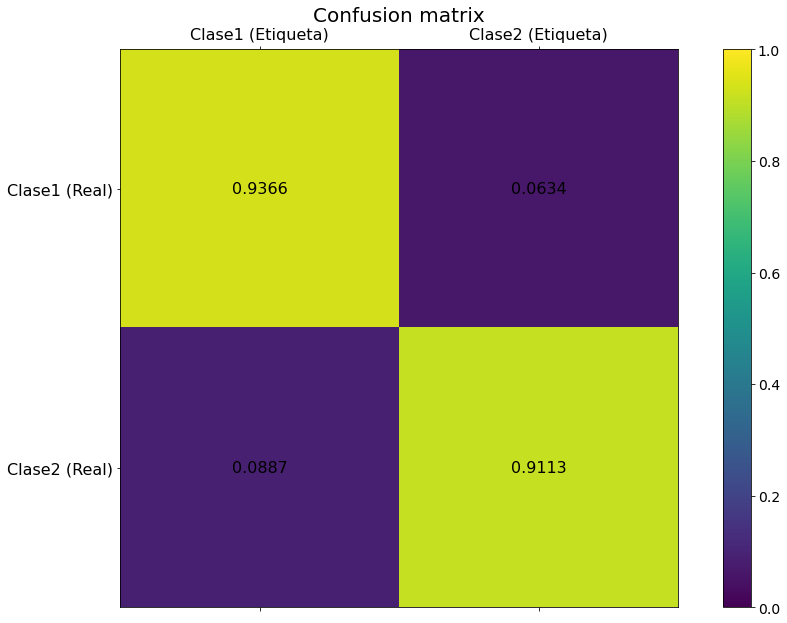

In [61]:
cm = metrics.confusion_matrix(y_test,predictions)
plotCMa(cm,['Clase1','Clase2'])

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/secodenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


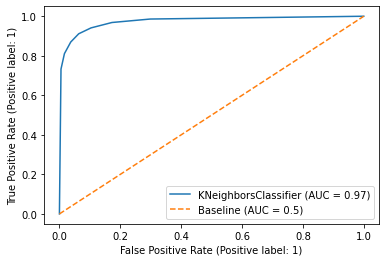

In [53]:
plot_roc_curve(knn, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend()

## Decision tree

In [54]:
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)
print('Accuracy', tree_clf.score(X_val, y_val))


Accuracy 0.8697259008315368


In [55]:
param_grid = [{'max_depth':[1,2,3,4,5,6,7,8,9,10]}
]

arbol_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(arbol_clf, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True)

In [56]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])


[0.80351083 0.82577315 0.85674691 0.86913185 0.87632531 0.89898351
 0.91029068 0.91792412 0.9256456  0.93242107] [{'max_depth': 1}, {'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}, {'max_depth': 10}]


In [57]:
tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(X_train, y_train)
print('Accuracy', tree_clf.score(X_val, y_val))


Accuracy 0.9309105841289396


In [58]:
validacion_tree=tree_clf.predict(X_test)


In [59]:
print(classification_report(y_test, validacion_tree))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4432
           1       0.95      0.94      0.94      5309

    accuracy                           0.94      9741
   macro avg       0.94      0.94      0.94      9741
weighted avg       0.94      0.94      0.94      9741



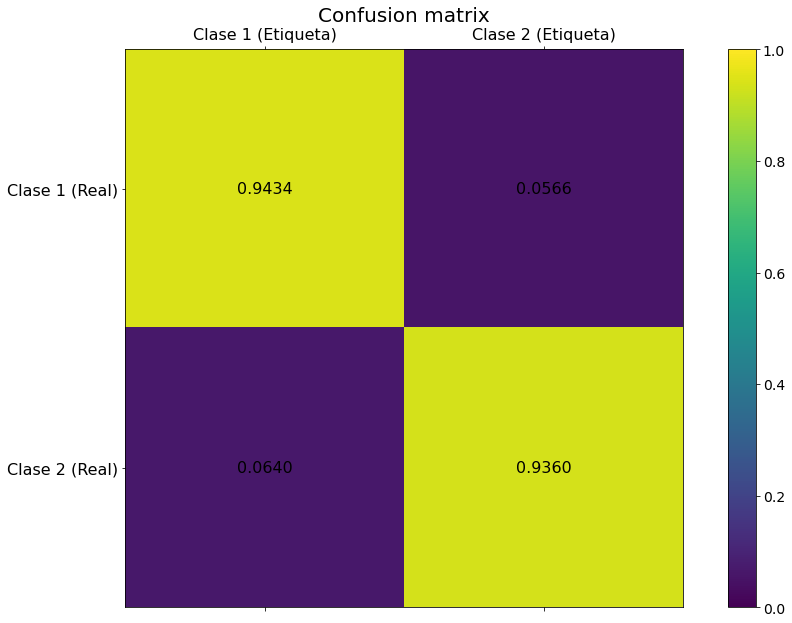

In [62]:
cm = metrics.confusion_matrix(y_test,validacion_tree)
plotCMa(cm,['Clase 1','Clase 2'])

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/secodenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


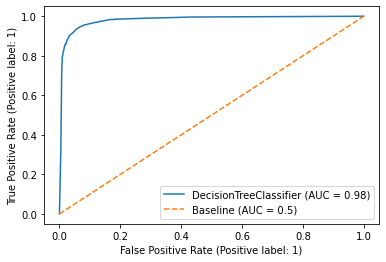

In [63]:
plot_roc_curve(tree_clf, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend()

## random forest

In [64]:
rndf_clf = RandomForestClassifier(n_estimators=150)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_val)

rndf_clf.score(X_val, y_val)


0.9695103172158915

In [65]:
param_grid = [{'n_estimators':[150,200,250,300,350,400,450,500]}
]

forest_clf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(forest_clf, param_grid, cv=2,
                          return_train_score=True)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [150, 200, 250, 300, 350, 400, 450,
                                           500]}],
             return_train_score=True)

In [66]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])


[0.95448546 0.95485943 0.95444146 0.95452946 0.95510141 0.95452946
 0.9552114  0.95516741] [{'n_estimators': 150}, {'n_estimators': 200}, {'n_estimators': 250}, {'n_estimators': 300}, {'n_estimators': 350}, {'n_estimators': 400}, {'n_estimators': 450}, {'n_estimators': 500}]


In [67]:
rndf_clf = RandomForestClassifier(n_estimators=450)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_val)

#print(y_pred)
#print(y_val.tolist())
rndf_clf.score(X_val, y_val)


0.9678677753824043

In [68]:
validacion=rndf_clf.predict(X_test)
print(classification_report(y_test, validacion))


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4432
           1       0.97      0.97      0.97      5309

    accuracy                           0.97      9741
   macro avg       0.97      0.97      0.97      9741
weighted avg       0.97      0.97      0.97      9741



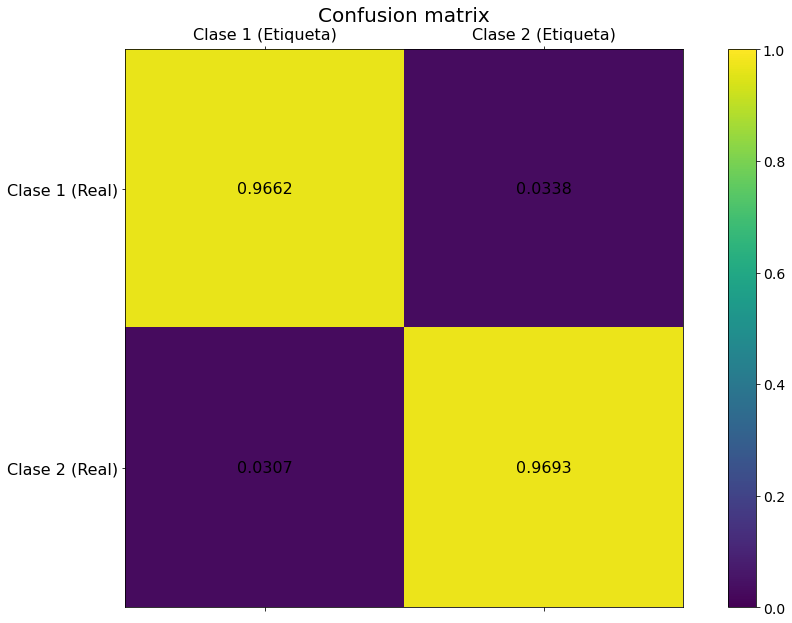

In [69]:
cm = metrics.confusion_matrix(y_test,validacion)
plotCMa(cm,['Clase 1','Clase 2'])

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/secodenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


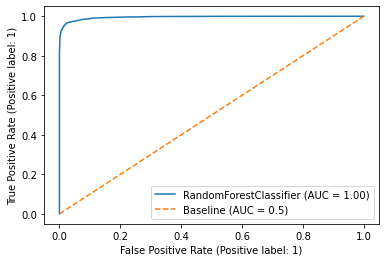

In [70]:
plot_roc_curve(rndf_clf, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend()

## logistic regression

In [71]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_val,y_val)

0.8357458166512678

sacando el pocentaje de las clases objetivo

In [35]:
y.value_counts()

1    71087
0    58793
Name: satisfaction, dtype: int64

In [36]:
58793/71087

0.8270569865094883

In [73]:
param_grid = [
    {'C':[1000,50,1,0.5,0.1,0.05],
    'class_weight':[{0: 0.82, 1: 0.18},{0: 0.80, 1: 0.20},{0: 0.1, 1: 0.9},{0: 0.05, 1: 0.95},{0: 0.4, 1: 0.6}],
    'penalty':['elasticnet'],
    'solver':['saga'],
    'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5]}
]

log_reg_clf = LogisticRegression()

from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(log_reg_clf, param_grid,cv=2,
                          return_train_score=True,scoring='f1',verbose=1)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 180 candidates, totalling 360 fits


/Users/matiasinostrozacifuentes/opt/anaconda3/envs/secodenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/secodenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/secodenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/secodenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/secodenv/lib/python3.9/site-packages/sklearn/linear_model

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid=[{'C': [1000, 50, 1, 0.5, 0.1, 0.05],
                          'class_weight': [{0: 0.82, 1: 0.18}, {0: 0.8, 1: 0.2},
                                           {0: 0.1, 1: 0.9}, {0: 0.05, 1: 0.95},
                                           {0: 0.4, 1: 0.6}],
                          'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             return_train_score=True, scoring='f1', verbose=1)

In [74]:
print('Mejores hiperparametros: %s' % grid_search.best_params_)

Mejores hiperparametros: {'C': 1000, 'class_weight': {0: 0.4, 1: 0.6}, 'l1_ratio': 0, 'penalty': 'elasticnet', 'solver': 'saga'}


In [75]:
print('Best Score: %s' % grid_search.best_score_)

Best Score: 0.8434151463501135


In [76]:
log_reg = LogisticRegression(C=1000,penalty='elasticnet',class_weight={0: 0.4, 1: 0.6},solver='saga',l1_ratio=0)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight={0: 0.4, 1: 0.6}, l1_ratio=0,
                   penalty='elasticnet', solver='saga')

In [77]:
log_reg.score(X_val,y_val)

0.8246586592752284

In [78]:
predictions_regressor = log_reg.predict(X_test)
print(classification_report(y_test, predictions_regressor))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      4432
           1       0.81      0.88      0.85      5309

    accuracy                           0.82      9741
   macro avg       0.83      0.82      0.82      9741
weighted avg       0.83      0.82      0.82      9741



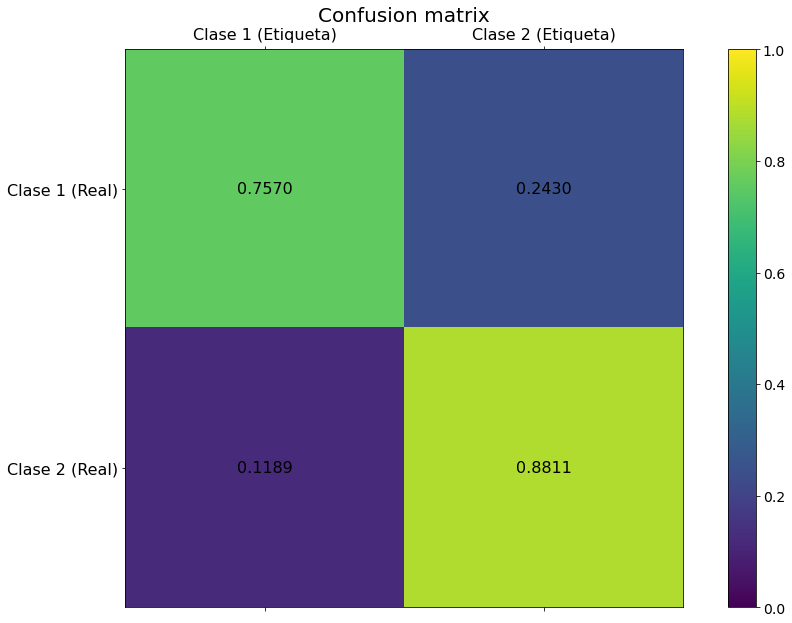

In [79]:
cm = metrics.confusion_matrix(y_test,predictions_regressor)
plotCMa(cm,['Clase 1','Clase 2'])

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/secodenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


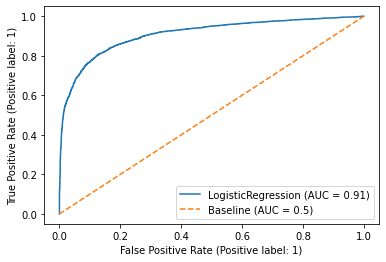

In [80]:
plot_roc_curve(log_reg, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend()

## ridge

In [109]:
rid_clf = RidgeClassifier(alpha=10) #probar cambiar alpha
rid_clf.fit(X_train, y_train)
rid_clf.score(X_val, y_val)

0.8369777230263833

In [110]:
alpha_range = list(range(5, 150))
param_grid = dict(alpha=alpha_range)

rid_clf = RidgeClassifier()



grid_search = GridSearchCV(rid_clf, param_grid,cv=2,
                          return_train_score=True,verbose=1)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 145 candidates, totalling 290 fits


GridSearchCV(cv=2, estimator=RidgeClassifier(),
             param_grid={'alpha': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
                                   28, 29, 30, 31, 32, 33, 34, ...]},
             return_train_score=True, verbose=1)

In [111]:
print('Mejores hiperparametros: %s' % grid_search.best_params_)

Mejores hiperparametros: {'alpha': 5}


In [112]:
print('Best Score: %s' % grid_search.best_score_)

Best Score: 0.8345945708126182


In [113]:
rid_clf = RidgeClassifier(alpha=5)
rid_clf.fit(X_train, y_train)

RidgeClassifier(alpha=5)

In [114]:
rid_clf.score(X_val,y_val)

0.8368750641617904

In [115]:
predictions_ridge = rid_clf.predict(X_test)
print(classification_report(y_test, predictions_ridge))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      4432
           1       0.86      0.84      0.85      5309

    accuracy                           0.84      9741
   macro avg       0.84      0.84      0.84      9741
weighted avg       0.84      0.84      0.84      9741



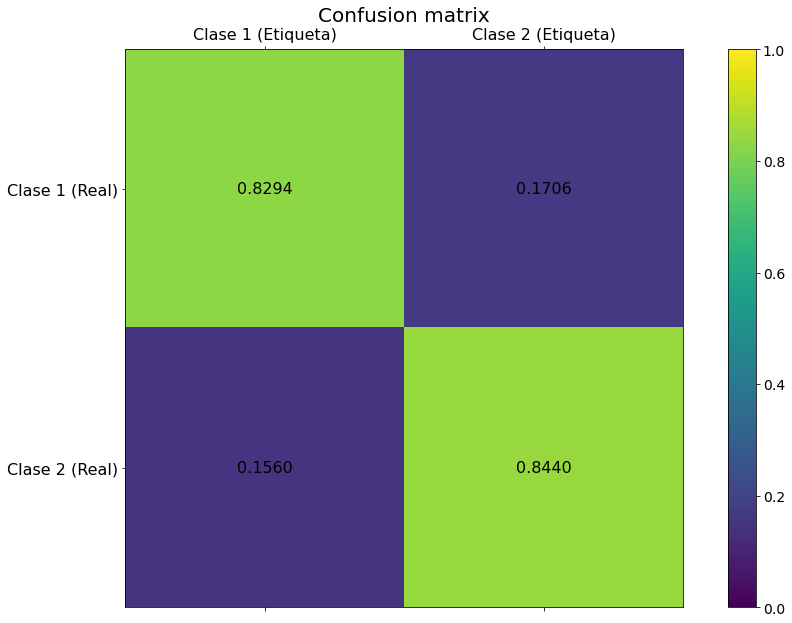

In [116]:
cm = metrics.confusion_matrix(y_test,predictions_ridge)
plotCMa(cm,['Clase 1','Clase 2'])

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/secodenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


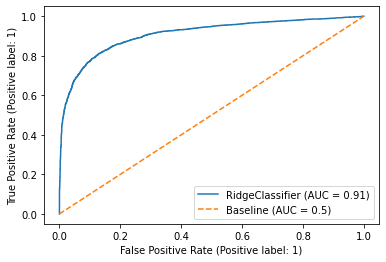

In [117]:
plot_roc_curve(rid_clf, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend()

## bagging tree

In [100]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=300,
    max_samples=300, bootstrap=True
)

bag_clf.fit(X_train, y_train)
bag_clf.score(X_val, y_val)

0.8963145467611128

In [101]:
estimators_range = list(range(150,1000,100))
samples_range=list(range(150,1000,100))
param_grid = dict(n_estimators=estimators_range,max_samples=samples_range)


bag_clf = BaggingClassifier()

from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(bag_clf, param_grid,cv=2,
                          return_train_score=True,scoring='f1',verbose=1)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


GridSearchCV(cv=2, estimator=BaggingClassifier(),
             param_grid={'max_samples': [150, 250, 350, 450, 550, 650, 750, 850,
                                         950],
                         'n_estimators': [150, 250, 350, 450, 550, 650, 750,
                                          850, 950]},
             return_train_score=True, scoring='f1', verbose=1)

In [102]:
print('Mejores hiperparametros: %s' % grid_search.best_params_)

Mejores hiperparametros: {'max_samples': 950, 'n_estimators': 950}


In [103]:
print('Best Score: %s' % grid_search.best_score_)

Best Score: 0.924006320024944


In [104]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=950,
    max_samples=950, bootstrap=True
)

bag_clf.fit(X_train, y_train)
bag_clf.score(X_val, y_val)

0.9219792629093522

In [105]:
predictions_bag = bag_clf.predict(X_test)
print(classification_report(y_test, predictions_bag))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      4432
           1       0.92      0.94      0.93      5309

    accuracy                           0.92      9741
   macro avg       0.92      0.92      0.92      9741
weighted avg       0.92      0.92      0.92      9741



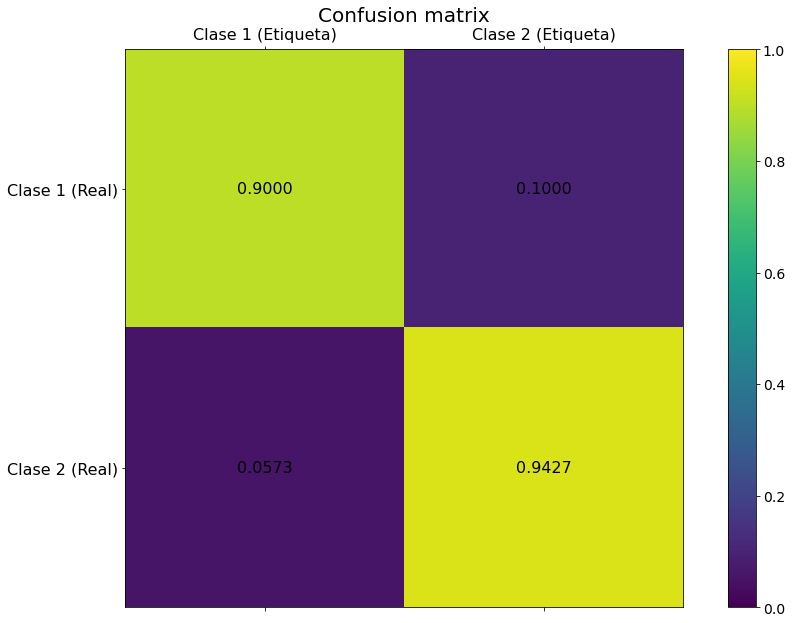

In [106]:
cm = metrics.confusion_matrix(y_test,predictions_bag)
plotCMa(cm,['Clase 1','Clase 2'])

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/secodenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


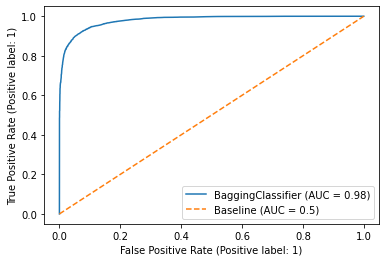

In [107]:
plot_roc_curve(bag_clf, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend()